<a href="https://colab.research.google.com/github/johanjun/seoul_bike_share/blob/main/Preprocessing(df_all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive

# DateTime
import datetime
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os
import pickle
import tqdm

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [4]:
import os
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd drive/MyDrive/

/content/drive/MyDrive


In [6]:
df_all = pd.read_csv('data/seoul_bike_sharing/df_all_with_address.csv')

In [10]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765202 entries, 0 to 19765219
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0    int64         
 1   rent_date     datetime64[ns]
 2   rent_hour     float64       
 3   station_no    int64         
 4   station_name  object        
 5   rent_type     object        
 6   sex           object        
 7   age_type      object        
 8   rent_count    float64       
 9   momentum      float64       
 10  green         float64       
 11  distance      float64       
 12  use_hour      float64       
 13  address       object        
 14  gu            object        
 15  DateTime      datetime64[ns]
dtypes: datetime64[ns](2), float64(6), int64(2), object(6)
memory usage: 2.5+ GB


In [12]:
del df_all['Unnamed: 0']

In [8]:
#rent_hour기준 결측치 제거
df_all = df_all.dropna(subset=['rent_hour'])

#datetime variable 추가
if 'rent_date' in df_all.columns:
    df_all['rent_date'] = pd.to_datetime(df_all['rent_date'])
    # df_all['DateTime'] = pd.to_datetime(df_all['rent_date'])

In [15]:
#rent_date에 hour 추가
df_all['rent_hour'] = df_all['rent_hour'].apply(lambda x : int(x))

In [58]:
df_all.head()

,rent_date,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu,DateTime,rent_date_string1
0,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1.00,33.96,0.30,"1,280.00",6.00,서울특별시 양재대로 1572,강동구,2020-01-01,0
1,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,NaN,30대,1.00,169.31,1.17,"5,030.00",39.00,서울특별시 양재대로 1572,강동구,2020-01-01,0
2,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,M,30대,1.00,83.26,0.68,"2,920.00",14.00,서울특별시 양재대로 1572,강동구,2020-01-01,0
3,2020-01-01 01:00:00,1,1044,1044. 굽은다리역,정기권,NaN,50대,1.00,41.83,0.32,"1,390.00",5.00,서울특별시 양재대로 1572,강동구,2020-01-01,0
4,2020-01-01 02:00:00,2,1044,1044. 굽은다리역,정기권,NaN,30대,1.00,41.34,0.40,"1,740.00",9.00,서울특별시 양재대로 1572,강동구,2020-01-01,0


In [108]:
del df_all['rent_date_string3']

In [92]:
df_all['rent_date_string'] = [str(i) for i in df_all['rent_date']]

In [104]:
df_all['rent_date_string2'] = [i[:10] for i in df_all['rent_date_string']]

In [109]:
df_all['rent_date_string3'] = [' '+str(i)+':00:00' for i in df_all['rent_hour']]

In [111]:
df_all['rent_date_string4'] = df_all['rent_date_string2'] + df_all['rent_date_string3']

In [116]:
df_all['rent_date(hour)'] = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in df_all['rent_date_string4']]

In [117]:
df_all.head()

,rent_date,rent_hour,station_no,station_name,rent_type,sex,age_type,rent_count,momentum,green,distance,use_hour,address,gu,DateTime,rent_date_string,rent_date_string2,rent_date_string3,rent_date_string4,rent_date(hour)
0,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1.00,33.96,0.30,"1,280.00",6.00,서울특별시 양재대로 1572,강동구,2020-01-01,2020-01-01 00:00:00,2020-01-01,0:00:00,2020-01-01 0:00:00,2020-01-01 00:00:00
1,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,NaN,30대,1.00,169.31,1.17,"5,030.00",39.00,서울특별시 양재대로 1572,강동구,2020-01-01,2020-01-01 00:00:00,2020-01-01,0:00:00,2020-01-01 0:00:00,2020-01-01 00:00:00
2,2020-01-01 00:00:00,0,1044,1044. 굽은다리역,정기권,M,30대,1.00,83.26,0.68,"2,920.00",14.00,서울특별시 양재대로 1572,강동구,2020-01-01,2020-01-01 00:00:00,2020-01-01,0:00:00,2020-01-01 0:00:00,2020-01-01 00:00:00
3,2020-01-01 01:00:00,1,1044,1044. 굽은다리역,정기권,NaN,50대,1.00,41.83,0.32,"1,390.00",5.00,서울특별시 양재대로 1572,강동구,2020-01-01,2020-01-01 01:00:00,2020-01-01,1:00:00,2020-01-01 1:00:00,2020-01-01 01:00:00
4,2020-01-01 02:00:00,2,1044,1044. 굽은다리역,정기권,NaN,30대,1.00,41.34,0.40,"1,740.00",9.00,서울특별시 양재대로 1572,강동구,2020-01-01,2020-01-01 02:00:00,2020-01-01,2:00:00,2020-01-01 2:00:00,2020-01-01 02:00:00


In [119]:
del df_all['rent_date']
del df_all['rent_date_string']
del df_all['rent_date_string2']
del df_all['rent_date_string3']
del df_all['rent_date_string4']

In [123]:
 df_all['DateTime'] = df_all['rent_date(hour)']

In [126]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19765202 entries, 0 to 19765219
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   rent_hour        int64         
 1   station_no       int64         
 2   station_name     object        
 3   rent_type        object        
 4   sex              object        
 5   age_type         object        
 6   rent_count       float64       
 7   momentum         float64       
 8   green            float64       
 9   distance         float64       
 10  use_hour         float64       
 11  address          object        
 12  gu               object        
 13  rent_date(hour)  datetime64[ns]
 14  DateTime         datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(2), object(6)
memory usage: 2.4+ GB


In [127]:
df_all.set_index('rent_date(hour)', inplace=True)

In [128]:
df_all.index #freq 없음

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:00',
               '2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 02:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 03:00:00', '2020-01-01 06:00:00',
               ...
               '2021-01-31 18:00:00', '2021-01-24 10:00:00',
               '2021-01-24 11:00:00', '2021-01-24 15:00:00',
               '2021-01-25 18:00:00', '2021-01-25 19:00:00',
               '2021-01-25 19:00:00', '2021-01-27 13:00:00',
               '2021-01-30 16:00:00', '2021-01-31 18:00:00'],
              dtype='datetime64[ns]', name='rent_date(hour)', length=19765202, freq=None)

In [129]:
df_gangdong = df_all[df_all.gu == '강동구'].groupby(['DateTime'])['rent_count'].sum()
df_gangdong.head()

DateTime
2020-01-01 00:00:00   32.00
2020-01-01 01:00:00   24.00
2020-01-01 02:00:00   34.00
2020-01-01 03:00:00   18.00
2020-01-01 04:00:00   11.00
Name: rent_count, dtype: float64

In [131]:
df_gangdong = pd.DataFrame(df_gangdong)
df_gangdong.head()

,rent_count
DateTime,
2020-01-01 00:00:00,32.00
2020-01-01 01:00:00,24.00
2020-01-01 02:00:00,34.00
2020-01-01 03:00:00,18.00
2020-01-01 04:00:00,11.00


In [134]:
df_gangdong = df_gangdong.asfreq('H')
df_gangdong.isnull().sum()

rent_count    83
dtype: int64

In [135]:
df_gangdong.fillna(0, inplace=True)

In [137]:
df_gangdong.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2021-01-31 14:00:00', '2021-01-31 15:00:00',
               '2021-01-31 16:00:00', '2021-01-31 17:00:00',
               '2021-01-31 18:00:00', '2021-01-31 19:00:00',
               '2021-01-31 20:00:00', '2021-01-31 21:00:00',
               '2021-01-31 22:00:00', '2021-01-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=9528, freq='H')

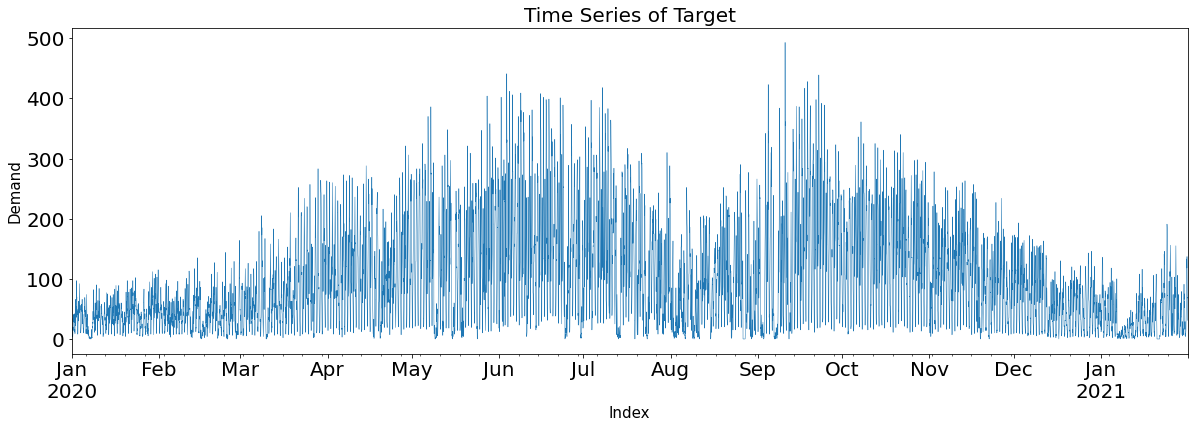

In [140]:
df_gangdong['rent_count'].plot(kind='line', figsize=(20,6), linewidth=0.5, fontsize=20)

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


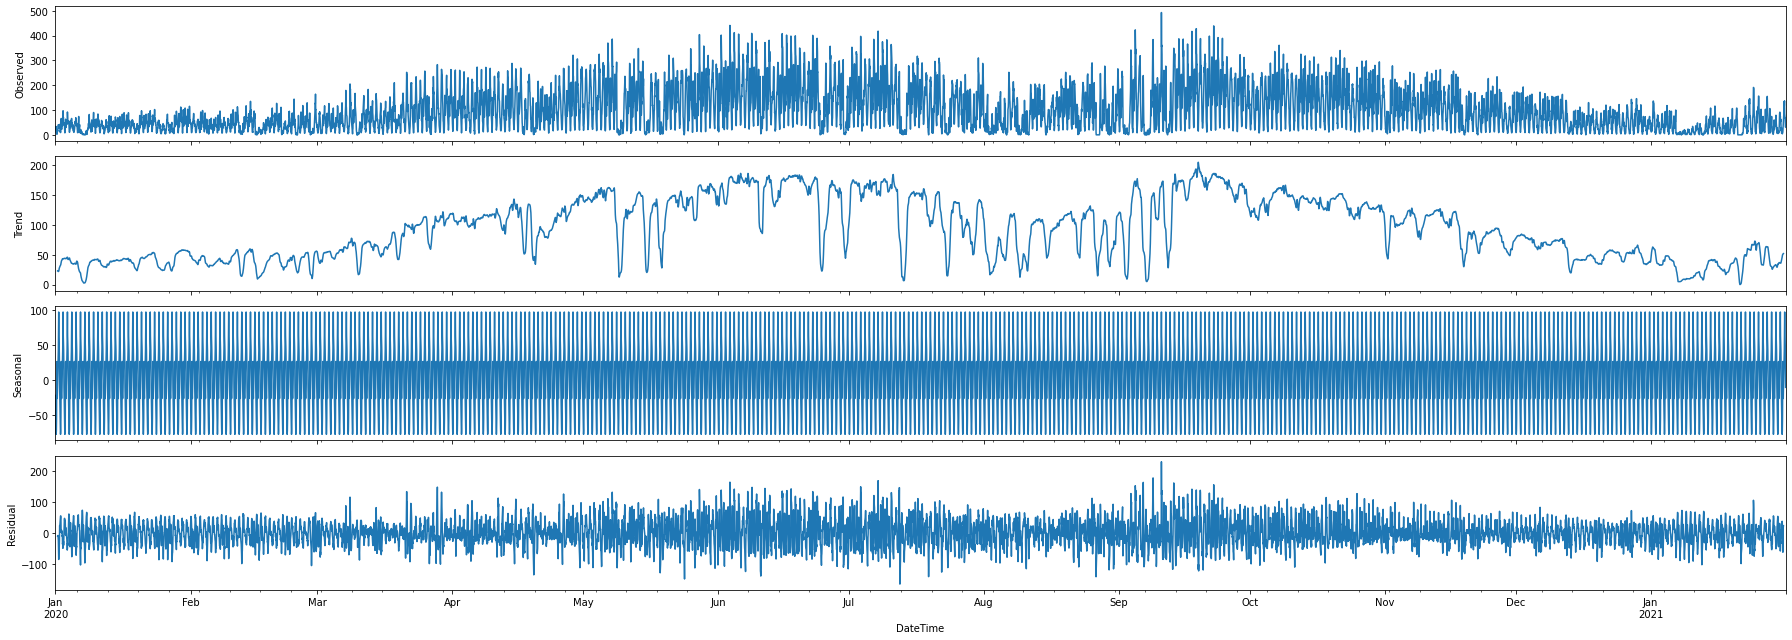

In [144]:
# plt.figure(figsize=(20,6))
plt.rcParams['figure.figsize'] = (25,9)
sm.tsa.seasonal_decompose(df_gangdong['rent_count'], model='additive').plot()
plt.show()

In [145]:
result = sm.tsa.seasonal_decompose(df_gangdong['rent_count'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.iloc[:]

,rent_count
DateTime,
2020-01-01 00:00:00,nan
2020-01-01 01:00:00,nan
2020-01-01 02:00:00,nan
2020-01-01 03:00:00,nan
2020-01-01 04:00:00,nan
...,...
2021-01-31 19:00:00,nan
2021-01-31 20:00:00,nan
2021-01-31 21:00:00,nan


In [146]:
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['rent_trend']

In [147]:
Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['rent_seasonal']

In [148]:
df_gangdong = pd.concat([df_gangdong, Y_trend, Y_seasonal], axis=1)

In [149]:
df_gangdong.head()

,rent_count,rent_trend,rent_seasonal
DateTime,,,
2020-01-01 00:00:00,32.00,23.21,-22.35
2020-01-01 01:00:00,24.00,23.21,-38.56
2020-01-01 02:00:00,34.00,23.21,-56.46
2020-01-01 03:00:00,18.00,23.21,-68.56
2020-01-01 04:00:00,11.00,23.21,-78.02


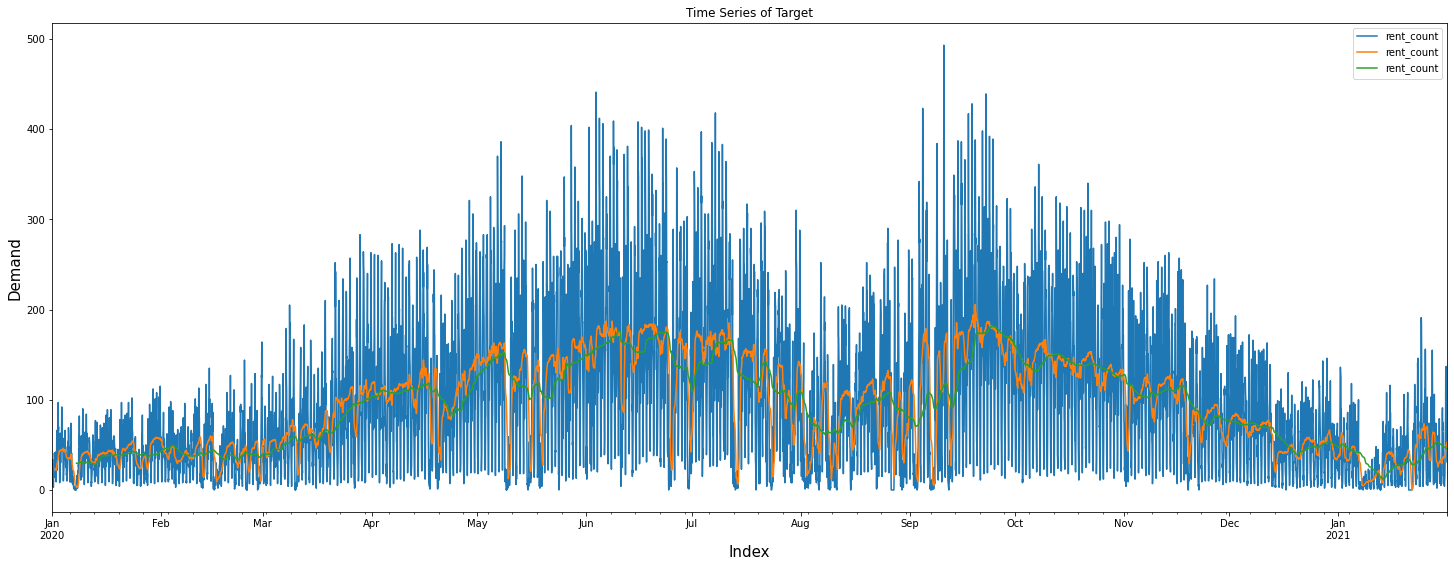

In [150]:
pd.concat([df_gangdong['rent_count'],
          df_gangdong[['rent_count']].rolling(24).mean(),
          df_gangdong[['rent_count']].rolling(24*7).mean()], axis=1).          plot(kind='line')
plt.title('Time Series of Target')
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

In [151]:
Y_count_Day = df_gangdong[['rent_count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']

Y_count_Week = df_gangdong[['rent_count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']

df_gangdong = pd.concat([df_gangdong, Y_count_Day], axis=1)
df_gangdong = pd.concat([df_gangdong, Y_count_Week], axis=1)

In [152]:
df_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week
DateTime,,,,,
2020-01-01 00:00:00,32.00,23.21,-22.35,23.29,29.80
2020-01-01 01:00:00,24.00,23.21,-38.56,23.29,29.80
2020-01-01 02:00:00,34.00,23.21,-56.46,23.29,29.80
2020-01-01 03:00:00,18.00,23.21,-68.56,23.29,29.80
2020-01-01 04:00:00,11.00,23.21,-78.02,23.29,29.80


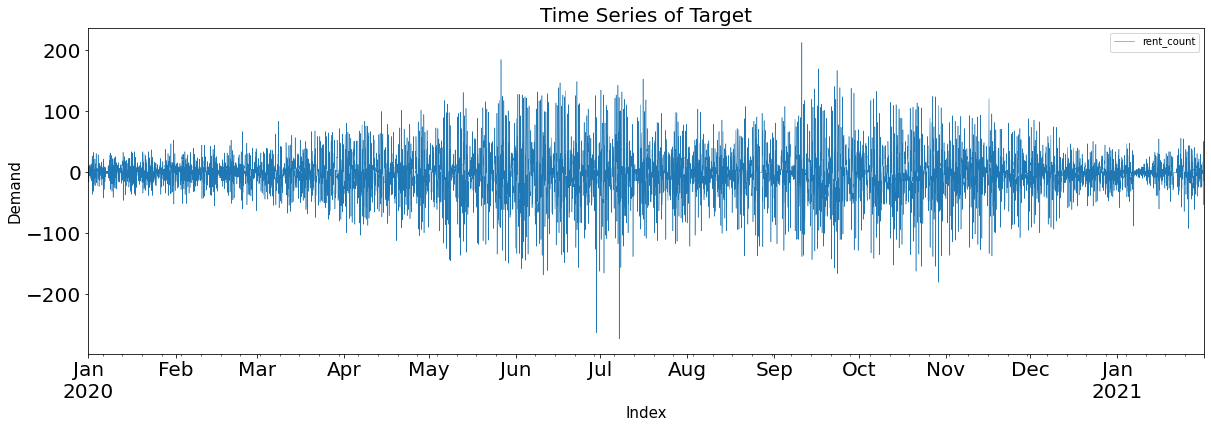

In [153]:
df_gangdong[['rent_count']].diff().plot(kind='line', figsize=(20,6), linewidth=0.5, fontsize=20)

plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()


In [154]:
Y_diff = df_gangdong[['rent_count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']

In [155]:
df_gangdong = pd.concat([df_gangdong, Y_diff], axis=1)
df_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff
DateTime,,,,,,
2020-01-01 00:00:00,32.00,23.21,-22.35,23.29,29.80,-8.00
2020-01-01 01:00:00,24.00,23.21,-38.56,23.29,29.80,-8.00
2020-01-01 02:00:00,34.00,23.21,-56.46,23.29,29.80,10.00
2020-01-01 03:00:00,18.00,23.21,-68.56,23.29,29.80,-16.00
2020-01-01 04:00:00,11.00,23.21,-78.02,23.29,29.80,-7.00
...,...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,62.70,50.92,45.58,-10.00
2021-01-31 20:00:00,68.00,52.10,53.66,51.12,45.55,-6.00
2021-01-31 21:00:00,69.00,52.10,43.02,52.08,45.61,1.00


In [156]:
df_gangdong['DateTime'] = df_gangdong.index

In [157]:
df_gangdong['Year'] = df_gangdong.DateTime.dt.year
df_gangdong['Quarter'] = df_gangdong.DateTime.dt.quarter
df_gangdong['Day'] = df_gangdong.DateTime.dt.day
df_gangdong['DayofWeek'] = df_gangdong.DateTime.dt.dayofweek
df_gangdong

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek
DateTime,,,,,,,,,,,
2020-01-01 00:00:00,32.00,23.21,-22.35,23.29,29.80,-8.00,2020-01-01 00:00:00,2020,1,1,2
2020-01-01 01:00:00,24.00,23.21,-38.56,23.29,29.80,-8.00,2020-01-01 01:00:00,2020,1,1,2
2020-01-01 02:00:00,34.00,23.21,-56.46,23.29,29.80,10.00,2020-01-01 02:00:00,2020,1,1,2
2020-01-01 03:00:00,18.00,23.21,-68.56,23.29,29.80,-16.00,2020-01-01 03:00:00,2020,1,1,2
2020-01-01 04:00:00,11.00,23.21,-78.02,23.29,29.80,-7.00,2020-01-01 04:00:00,2020,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,74.00,52.10,62.70,50.92,45.58,-10.00,2021-01-31 19:00:00,2021,1,31,6
2021-01-31 20:00:00,68.00,52.10,53.66,51.12,45.55,-6.00,2021-01-31 20:00:00,2021,1,31,6
2021-01-31 21:00:00,69.00,52.10,43.02,52.08,45.61,1.00,2021-01-31 21:00:00,2021,1,31,6


In [158]:
df_gangdong['rent_count_lag1'] = df_gangdong['rent_count'].shift(1)
df_gangdong['rent_count_lag2'] = df_gangdong['rent_count'].shift(2)
df_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,,,
2020-01-01 00:00:00,32.00,23.21,-22.35,23.29,29.80,-8.00,2020-01-01 00:00:00,2020,1,1,2,nan,nan
2020-01-01 01:00:00,24.00,23.21,-38.56,23.29,29.80,-8.00,2020-01-01 01:00:00,2020,1,1,2,32.00,nan
2020-01-01 02:00:00,34.00,23.21,-56.46,23.29,29.80,10.00,2020-01-01 02:00:00,2020,1,1,2,24.00,32.00
2020-01-01 03:00:00,18.00,23.21,-68.56,23.29,29.80,-16.00,2020-01-01 03:00:00,2020,1,1,2,34.00,24.00
2020-01-01 04:00:00,11.00,23.21,-78.02,23.29,29.80,-7.00,2020-01-01 04:00:00,2020,1,1,2,18.00,34.00


In [159]:
df_gangdong['rent_count_lag1'].fillna(method='bfill', inplace=True)
df_gangdong['rent_count_lag2'].fillna(method='bfill', inplace=True)
df_gangdong.head()

,rent_count,rent_trend,rent_seasonal,count_Day,count_Week,count_diff,DateTime,Year,Quarter,Day,DayofWeek,rent_count_lag1,rent_count_lag2
DateTime,,,,,,,,,,,,,
2020-01-01 00:00:00,32.00,23.21,-22.35,23.29,29.80,-8.00,2020-01-01 00:00:00,2020,1,1,2,32.00,32.00
2020-01-01 01:00:00,24.00,23.21,-38.56,23.29,29.80,-8.00,2020-01-01 01:00:00,2020,1,1,2,32.00,32.00
2020-01-01 02:00:00,34.00,23.21,-56.46,23.29,29.80,10.00,2020-01-01 02:00:00,2020,1,1,2,24.00,32.00
2020-01-01 03:00:00,18.00,23.21,-68.56,23.29,29.80,-16.00,2020-01-01 03:00:00,2020,1,1,2,34.00,24.00
2020-01-01 04:00:00,11.00,23.21,-78.02,23.29,29.80,-7.00,2020-01-01 04:00:00,2020,1,1,2,18.00,34.00


In [161]:
Y_colname = ['rent_count']
X_remove = ['DateTime']
X_colname = [x for x in df_gangdong.columns if x not in Y_colname+X_remove]
len(X_colname)

11

In [163]:
data_train = df_gangdong.loc[df_gangdong.index < '2021-01-01', :]
data_test = df_gangdong.loc[df_gangdong.index >= '2021-01-01', :]
print(data_train.shape, data_test.shape)

(8784, 13) (744, 13)


In [164]:
Y_train = data_train[Y_colname]
X_train = data_train[X_colname]
Y_test = data_test[Y_colname]
X_test = data_test[X_colname]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8784, 11) (8784, 1)
(744, 11) (744, 1)


In [165]:
fit_reg1 = sm.OLS(Y_train, X_train).fit()
fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rent_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.019e+08
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        07:16:46   Log-Likelihood:                 9156.6
No. Observations:                8784   AIC:                        -1.829e+04
Df Residuals:                    8773   BIC:                        -1.821e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
rent_trend      -2.778e-05   5.54e-05     -0.502      0.616      -0.000    8.08e-05
rent_seasonal   -2.374e-05   3.01e-05     -0.788      0.431   -8.28e-05    3.53e-05
count_Day        -4.62e-06   5.46e-05     -0.085      0.933      -0.000       0.000
count_Week      -9.709e-06    4.5e-05     -0.216      0.829   -9.78e-05    7.84e-05
count_diff          1.0000   3.12e-05    3.2e+04      0.000       1.000       1.000
Year             4.349e-06   1.69e-06      2.579      0.010    1.04e-06    7.65e-06
Quarter            -0.0007      0.001     -0.845      0.398      -0.002       0.001
Day                -0.0002      0.000     -1.648      0.099      -0.000    3.23e-05
DayofWeek          -0.0002      0.000     -0.490      0.624      -0.001       0.001
rent_count_lag1     1.0000   3.07e-05   3.26e+04      0.000       1.000       1.000
rent_count_lag2   1.13e-06   2.74e-05      0.041      0.967   -5.26e-05    5.48e-05
==============================================================================
Omnibus:                    34233.415   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      28130156822.366
Skew:                          93.594   Prob(JB):                         0.00
Kurtosis:                    8767.891   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

In [167]:
pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])

,prediction
DateTime,
2020-01-01 00:00:00,24.01
2020-01-01 01:00:00,24.01
2020-01-01 02:00:00,34.01
2020-01-01 03:00:00,18.01
2020-01-01 04:00:00,11.01
...,...
2020-12-31 19:00:00,45.00
2020-12-31 20:00:00,59.00
2020-12-31 21:00:00,39.00


In [168]:
pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1)

,rent_count,prediction
DateTime,,
2020-01-01 00:00:00,32.00,24.01
2020-01-01 01:00:00,24.00,24.01
2020-01-01 02:00:00,34.00,34.01
2020-01-01 03:00:00,18.00,18.01
2020-01-01 04:00:00,11.00,11.01
...,...,...
2020-12-31 19:00:00,45.00,45.00
2020-12-31 20:00:00,59.00,59.00
2020-12-31 21:00:00,39.00,39.00


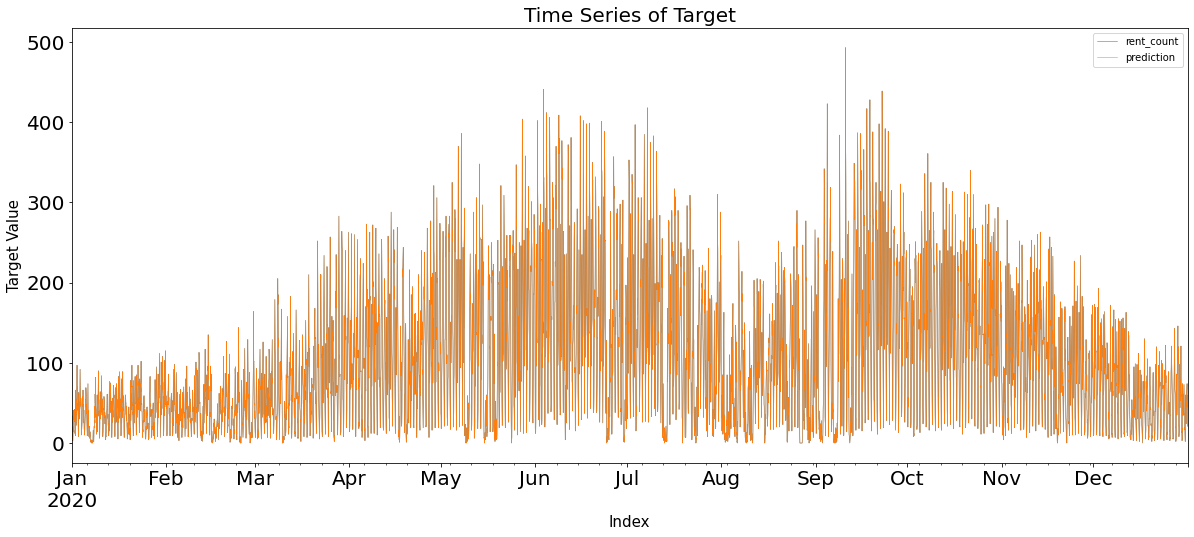

In [169]:
pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1)\
.plot(kind='line',
      figsize=(20,8),
      xlim=(Y_train.index.min(),Y_train.index.max()),
      linewidth=0.5,
      fontsize=20)
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Target Value', fontsize=15)
plt.show()

In [170]:
### Functionalize
### Evaluation of 1 pair of set
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual
# Score_tr, Residual_tr = evaluation(Y_train, pred_tr_reg1, graph_on=True)

### Evaluation of train/test pairs
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te
# Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)

,MAE,MSE,MAPE
Train,0.00,0.01,inf
Test,0.00,0.00,inf


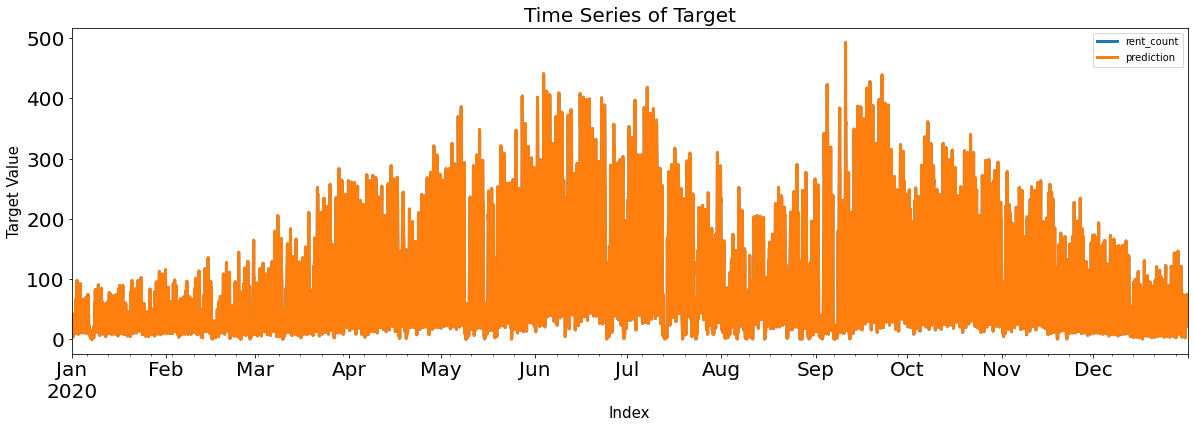

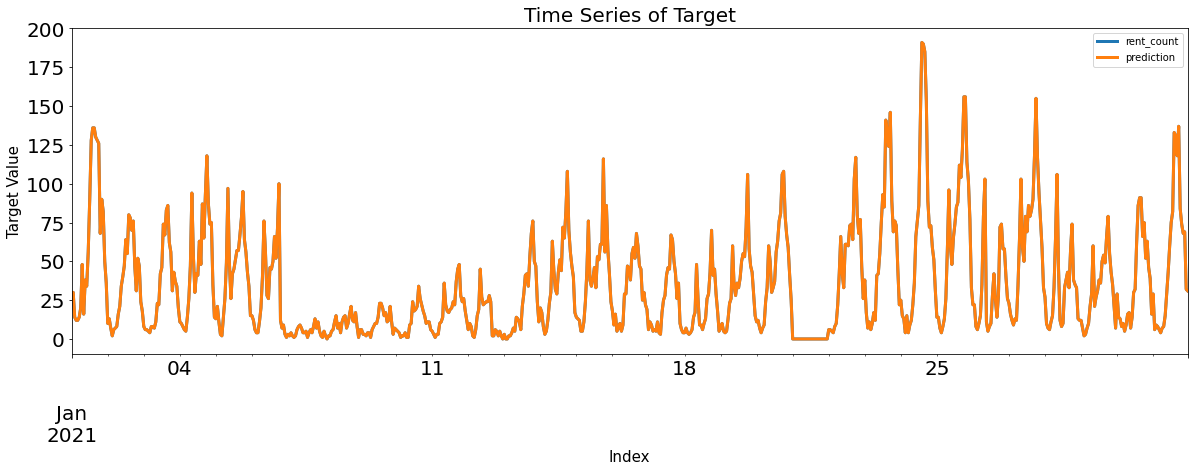

In [171]:
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)
Score_reg1

---

In [172]:
df_gangdong_origin = df_all[df_all.gu == '강동구'].groupby(['DateTime'])['rent_count', 'use_hour', 'momentum', 'green', 'distance'].sum()
df_gangdong_origin.head()

,rent_count,use_hour,momentum,green,distance
DateTime,,,,,
2020-01-01 00:00:00,32.00,325.00,"1,407.11",11.89,"51,110.00"
2020-01-01 01:00:00,24.00,267.00,"2,903.11",22.35,"96,330.00"
2020-01-01 02:00:00,34.00,615.00,"2,242.16",20.13,"86,840.00"
2020-01-01 03:00:00,18.00,269.00,"1,001.39",7.81,"33,680.00"
2020-01-01 04:00:00,11.00,169.00,900.40,7.49,"32,240.00"


In [173]:
df_gangdong_origin = pd.DataFrame(df_gangdong_origin)
df_gangdong_origin.head()

,rent_count,use_hour,momentum,green,distance
DateTime,,,,,
2020-01-01 00:00:00,32.00,325.00,"1,407.11",11.89,"51,110.00"
2020-01-01 01:00:00,24.00,267.00,"2,903.11",22.35,"96,330.00"
2020-01-01 02:00:00,34.00,615.00,"2,242.16",20.13,"86,840.00"
2020-01-01 03:00:00,18.00,269.00,"1,001.39",7.81,"33,680.00"
2020-01-01 04:00:00,11.00,169.00,900.40,7.49,"32,240.00"


In [174]:
df_gangdong_origin = df_gangdong_origin.asfreq('H')
df_gangdong_origin.isnull().sum()

rent_count    83
use_hour      83
momentum      83
green         83
distance      83
dtype: int64

In [175]:
df_gangdong_origin.fillna(0, inplace=True)

In [176]:
Y_colname = ['rent_count']
X_remove = ['DateTime']
X_colname = [x for x in df_gangdong_origin.columns if x not in Y_colname+X_remove]

data_train = df_gangdong_origin.loc[df_gangdong_origin.index < '2021-01-01', :]
data_test = df_gangdong_origin.loc[df_gangdong_origin.index >= '2021-01-01', :]
print(data_train.shape, data_test.shape)

Y_train = data_train[Y_colname]
X_train = data_train[X_colname]
Y_test = data_test[Y_colname]
X_test = data_test[X_colname]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8784, 5) (744, 5)
(8784, 4) (8784, 1)
(744, 4) (744, 1)


In [177]:
fit_reg1 = sm.OLS(Y_train, X_train).fit()
fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             rent_count   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                          2.706e+04
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                        0.00
Time:                        07:22:04   Log-Likelihood:                         -43690.
No. Observations:                8784   AIC:                                  8.739e+04
Df Residuals:                    8780   BIC:                                  8.742e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
use_hour       0.0305      0.000    303.731      0.000       0.030       0.031
momentum       0.0002    8.6e-05      1.939      0.053   -1.81e-06       0.000
green         93.7009     22.230      4.215      0.000      50.124     137.277
distance      -0.0217      0.005     -4.216      0.000      -0.032      -0.012
==============================================================================
Omnibus:                     3800.597   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67335.193
Skew:                          -1.622   Prob(JB):                         0.00
Kurtosis:                      16.170   Cond. No.                     5.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,MAE,MSE,MAPE
Train,0.00,0.01,inf
Test,0.00,0.00,inf


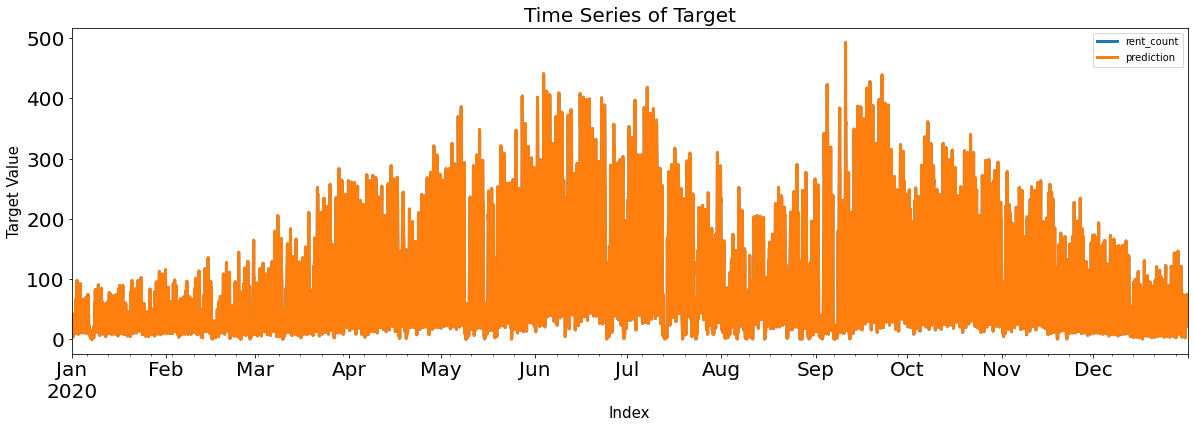

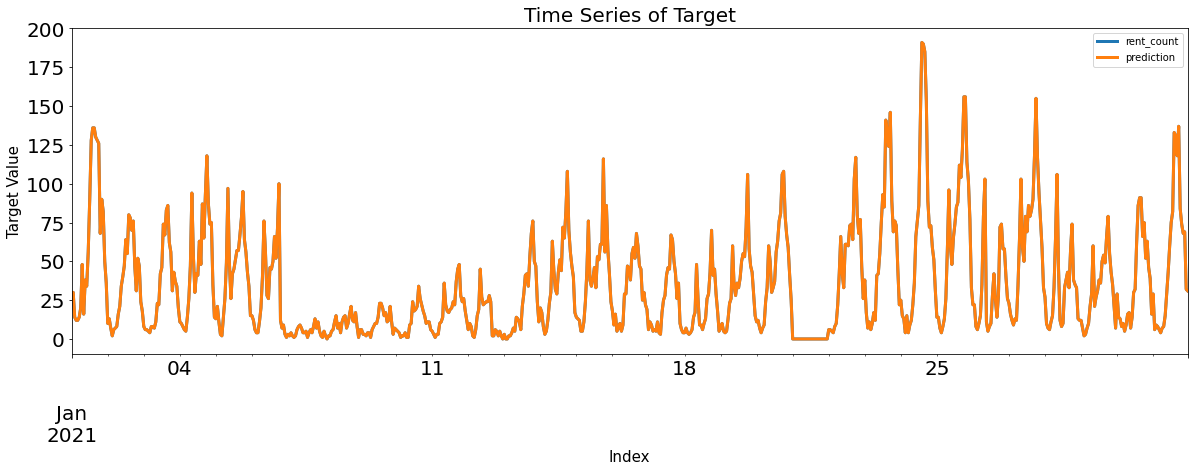

In [178]:
Score_reg1, Resid_tr_reg1, Resid_te_reg1 = evaluation_trte(Y_train, pred_tr_reg1, Y_test, pred_te_reg1, graph_on=True)
Score_reg1

In [186]:
cd /content/drive/My Drive/seoul_bike_share

/content/drive/My Drive/seoul_bike_share
